In [80]:
import numpy as np
import torch
import glob
import re

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [24]:
from traffic4cast.data.data_layout import volume_channel_indices
from traffic4cast.data.data_layout import channel_labels
from traffic4cast.data.data_layout import offset_map
from traffic4cast.data.dataset import T4CDataset

from traffic4cast.util.check_data_raw_dir import check_raw_data_dir
from traffic4cast.util.h5_util import load_h5_file

In [27]:
channel_labels

['volume_NE',
 'speed_NE',
 'volume_NW',
 'speed_NW',
 'volume_SE',
 'speed_SE',
 'volume_SW',
 'speed_SW',
 'incidents']

In [7]:
BASE_FOLDER = "/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast"
COMPETITION = "temporal"
check_raw_data_dir(BASE_FOLDER, show_missing=True)

File structure /Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast:  (✓)


In [10]:
# test
competition_files = glob.glob(f"{BASE_FOLDER}/**/*test_{COMPETITION}.h5", recursive=True)

/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast/MELBOURNE/MELBOURNE_test_temporal.h5


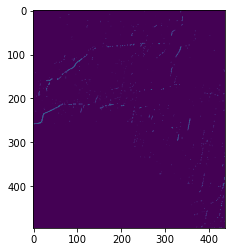

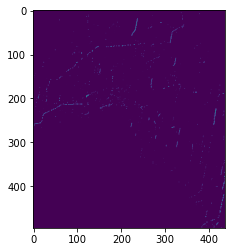

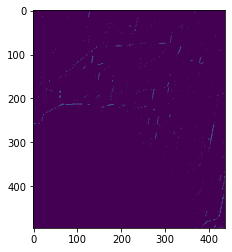

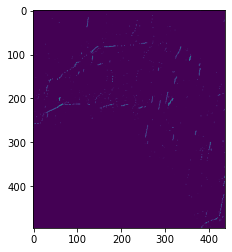

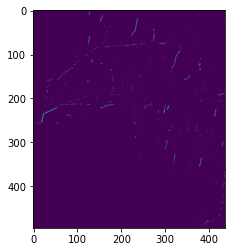

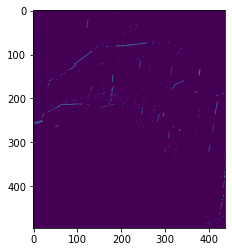

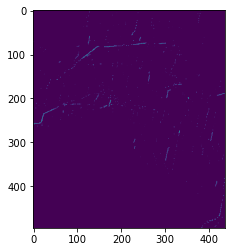

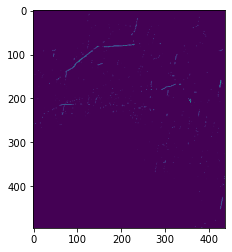

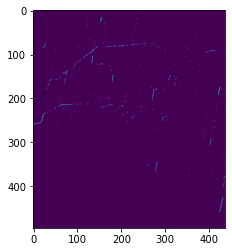

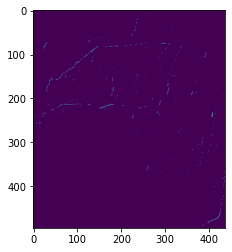

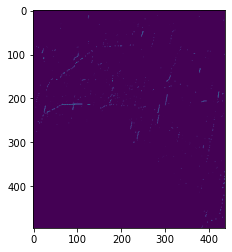

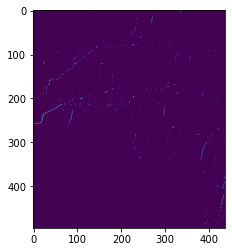

/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast/CHICAGO/CHICAGO_test_temporal.h5


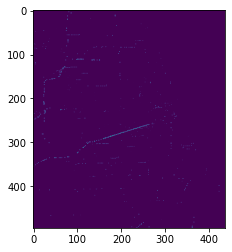

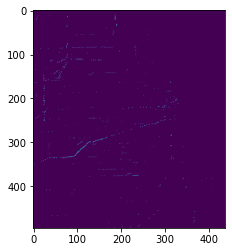

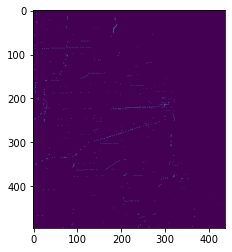

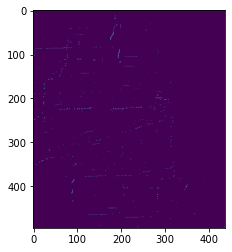

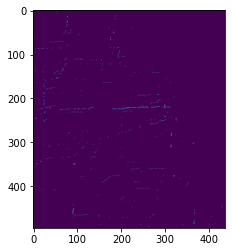

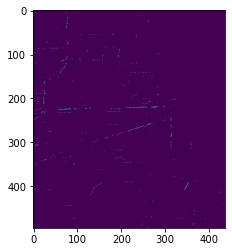

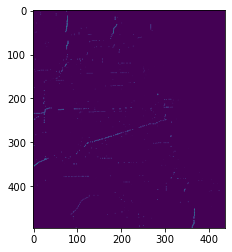

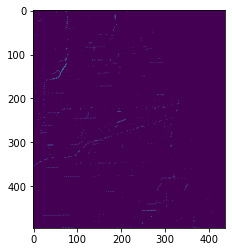

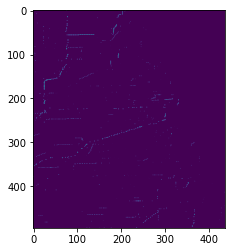

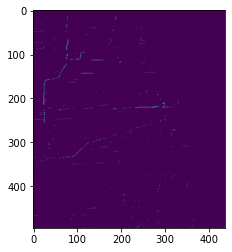

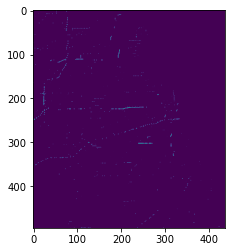

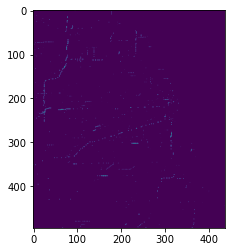

/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast/ISTANBUL/ISTANBUL_test_temporal.h5


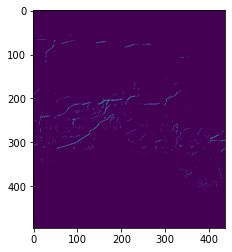

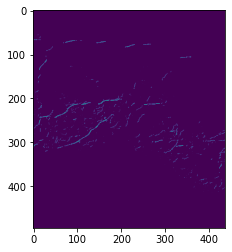

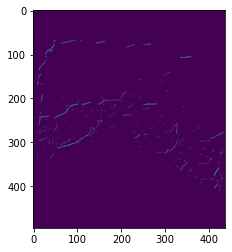

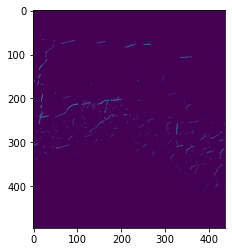

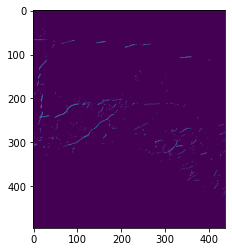

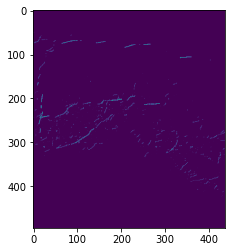

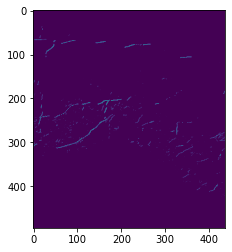

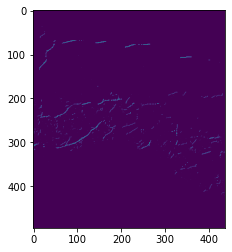

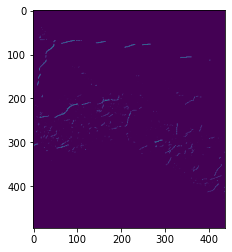

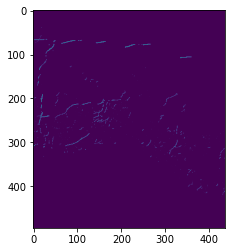

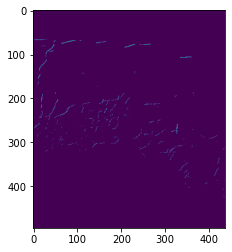

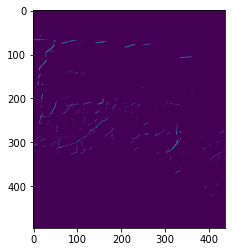

/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast/BERLIN/BERLIN_test_temporal.h5


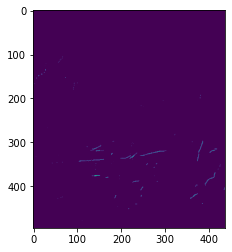

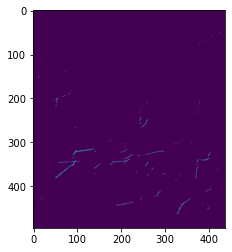

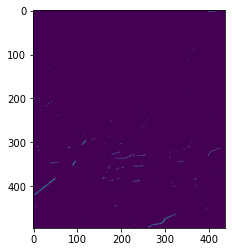

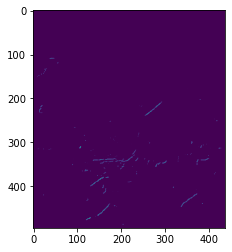

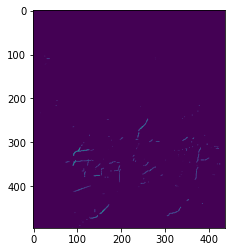

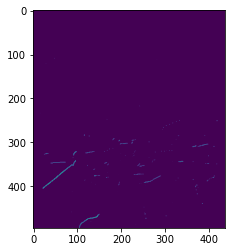

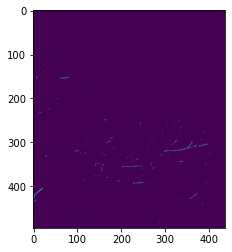

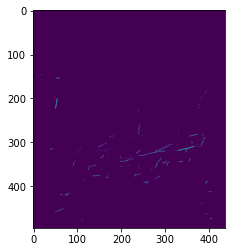

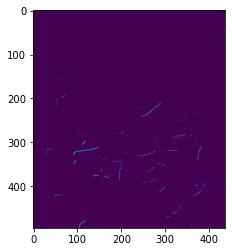

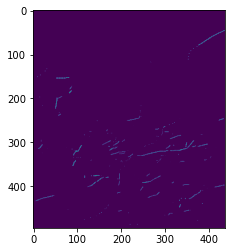

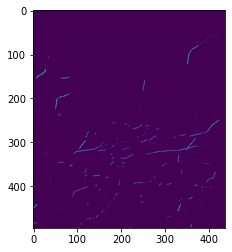

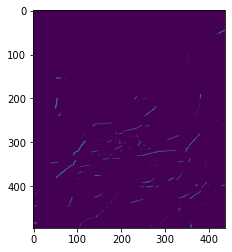

In [45]:
for competition_file in competition_files:
    print(competition_file)
    test_data: np.ndarray = load_h5_file(competition_file, sl=slice(11, 12), to_torch=False)
    test_map = test_data[0]
    
    for time_frame in range(12):
        plt.imshow(test_map[time_frame, :, :, 7])
        plt.show()
    

In [60]:
train2019 = T4CDataset(root_dir=BASE_FOLDER, file_filter='BARCELONA/training/2019*8ch.h5')
test2020 = T4CDataset(root_dir=BASE_FOLDER, file_filter='BARCELONA/training/2020*8ch.h5')

In [87]:
train2019.files[0]

PosixPath('/Users/Vsevolod.Konyakhin/Desktop/data/traffic4cast/BARCELONA/training/2019-05-02_BARCELONA_8ch.h5')

In [61]:
len(train2019)

43200

In [62]:
len(test2020)

43440

In [66]:
train2019[123][0].shape

torch.Size([12, 495, 436, 8])

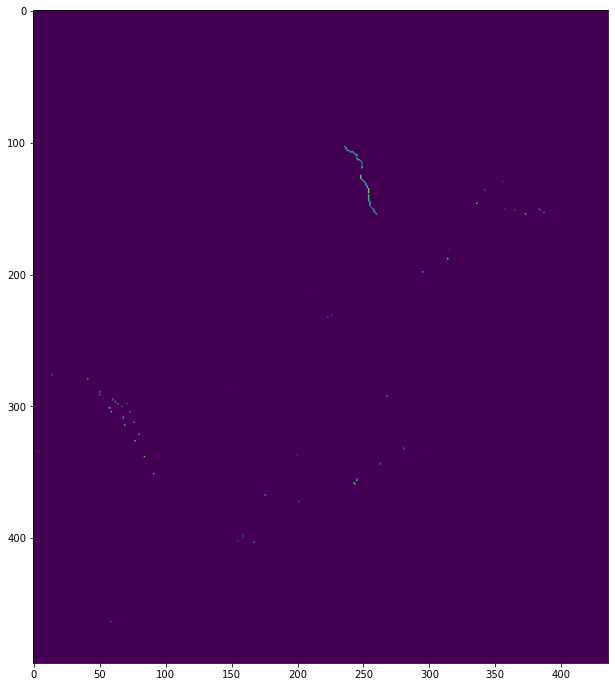

In [85]:
plt.imshow(train2019[12][1][0, :, :, 3].numpy())